<a href="https://colab.research.google.com/github/tqnhu2407/Image_Processing/blob/master/img_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import PIL
import matplotlib.pyplot as plt
import numpy as np

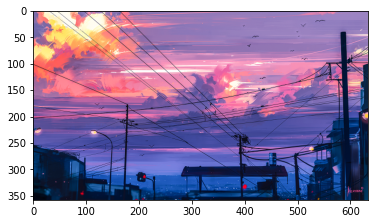

In [ ]:
im = PIL.Image.open('image.png')
im = np.array(im)
plt.imshow(im)

In [ ]:
width, height = im.shape[0], im.shape[1]
pixels = np.reshape(im, (width*height, 3))

In [ ]:
pixels

array([[165, 121, 174],
       [248, 138, 160],
       [223, 136, 167],
       ...,
       [  0,  62, 106],
       [  1,  63, 106],
       [  0,  62, 104]], dtype=uint8)

In [ ]:
class Image():

    def __init__(self, im, pixels, width, height):
        
        self.im = im
        self.pixels = pixels
        self.width = width
        self.height = height
    
    def flip_horizontal(self):

        for row in range(self.height):

            self.im[row].reversed


IndexError: ignored